In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error


# NUEVO CODIGO

## CON K BEST

In [ ]:
nombre_columna_objetivo = "ic_ali_pob"
X = datos1.drop(columns=[nombre_columna_objetivo])  # Eliminar la variable objetivo de las predictoras
y = datos1[nombre_columna_objetivo]  # Variable objetivo



In [ ]:
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)  # Aplicar selección


mejores_columnas = X.columns[selector.get_support()]

# Mostrar los resultados
print(f"Las {k} mejores variables predictoras son:\n", list(mejores_columnas))

Las 10 mejores variables predictoras son:
 ['P_8A14', 'P_8A14_F', 'P_12A14', 'P_12A14_F', 'P_15A17', 'P_15A17_F', 'P_10A14', 'P_10A14_F', 'P15PRI_INF', 'VPH_SINCINT']


In [ ]:
columnas_deseadas = ['ic_ali_pob', 'P_5YMAS','P15PRI_INF', 'VPH_SINCINT','P3A5_NOA', 'VPH_BICI']

# Reemplaza con los nombres correctos
df_filtrado = datos1[columnas_deseadas]

# Guardar en un nuevo archivo CSV
df_filtrado.to_csv("archivo_filtrado28.csv", index=False)

# Mostrar las primeras filas del nuevo archivo
print(df_filtrado.head())

   ic_ali_pob   P_5YMAS  P15PRI_INF  VPH_SINCINT  P3A5_NOA  VPH_BICI
0    145444.0  871193.0     18056.0      74227.0   18639.0   54393.0
1     13870.0   46095.0      2090.0       7206.0    1509.0    5587.0
2     10552.0   52691.0      2797.0       8061.0    1688.0    2574.0
3      3980.0   15254.0       627.0       1912.0     423.0    2211.0
4     22945.0  117571.0      3243.0      11447.0    3249.0   12579.0


In [ ]:
datos1 = pd.read_csv("archivo_modificado20.csv")

In [ ]:
print(datos1.dtypes)

ic_ali_pob      object
POBTOT         float64
POBFEM         float64
POBMAS         float64
P_0A2          float64
                ...   
VPH_CVJ        float64
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
Length: 277, dtype: object


In [ ]:
datos1.replace('n.d', np.nan, inplace=True)
datos1['ic_ali_pob'] = datos1['ic_ali_pob'].str.replace(',', '').astype(float)
datos1.fillna(datos1.median(), inplace=True)

datos1 = datos1.astype(float)

In [ ]:
num_columnas_objeto = datos1.select_dtypes(include=['object']).shape[1]
print(num_columnas_objeto)

0


In [ ]:
datos1["ic_ali_pob"] = pd.to_numeric(datos1["ic_ali_pob"], errors="coerce")

In [ ]:
num_nulos = datos1["ic_ali_pob"].isnull().sum()
print(num_nulos)

0


In [ ]:
print(datos1.isnull().sum())


ic_ali_pob     0
POBTOT         0
POBFEM         0
POBMAS         0
P_0A2          0
              ..
VPH_CVJ        0
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
Length: 277, dtype: int64


In [ ]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Columns: 277 entries, ic_ali_pob to VPH_SINTIC
dtypes: float64(277)
memory usage: 5.2 MB


In [ ]:
columnas_deseadas = ['ic_ali_pob', 'P_5YMAS','P15PRI_INF', 'VPH_SINCINT','P3A5_NOA', 'VPH_BICI']

# Reemplaza con los nombres correctos
df_filtrado = datos1[columnas_deseadas]

# Guardar en un nuevo archivo CSV
df_filtrado.to_csv("archivo_filtrado28.csv", index=False)

# Mostrar las primeras filas del nuevo archivo
print(df_filtrado.head())

## LECTURA DE ARCHIVO CON VARIBABLES SELECCIONADAS

In [ ]:
datos2 = pd.read_csv("archivo_filtrado28.csv")

In [ ]:
datos2.head(10)

,ic_ali_pob,P_5YMAS,P15PRI_INF,VPH_SINCINT,P3A5_NOA,VPH_BICI
0,145444.0,871193.0,18056.0,74227.0,18639.0,54393.0
1,13870.0,46095.0,2090.0,7206.0,1509.0,5587.0
2,10552.0,52691.0,2797.0,8061.0,1688.0,2574.0
3,3980.0,15254.0,627.0,1912.0,423.0,2211.0
4,22945.0,117571.0,3243.0,11447.0,3249.0,12579.0
5,7501.0,42881.0,1311.0,4493.0,1276.0,6917.0
6,12825.0,51232.0,1680.0,6371.0,1443.0,8296.0
7,967.0,8484.0,304.0,1464.0,195.0,514.0
8,4572.0,20212.0,935.0,3037.0,512.0,2699.0
9,4924.0,18740.0,847.0,3526.0,554.0,3200.0


In [ ]:
nombre_objetivo = "ic_ali_pob"  # Reemplázalo con tu variable objetivo

# Calcular la correlación de todas las variables con la variable objetivo
correlaciones = datos2.corr()[nombre_objetivo].sort_values(ascending=False)

# Mostrar resultados
print("Correlación de cada variable con", nombre_objetivo)
print(correlaciones)

Correlación de cada variable con ic_ali_pob
ic_ali_pob     1.000000
VPH_SINCINT    0.947420
P15PRI_INF     0.935092
P_5YMAS        0.919083
P3A5_NOA       0.882622
VPH_BICI       0.881548
Name: ic_ali_pob, dtype: float64


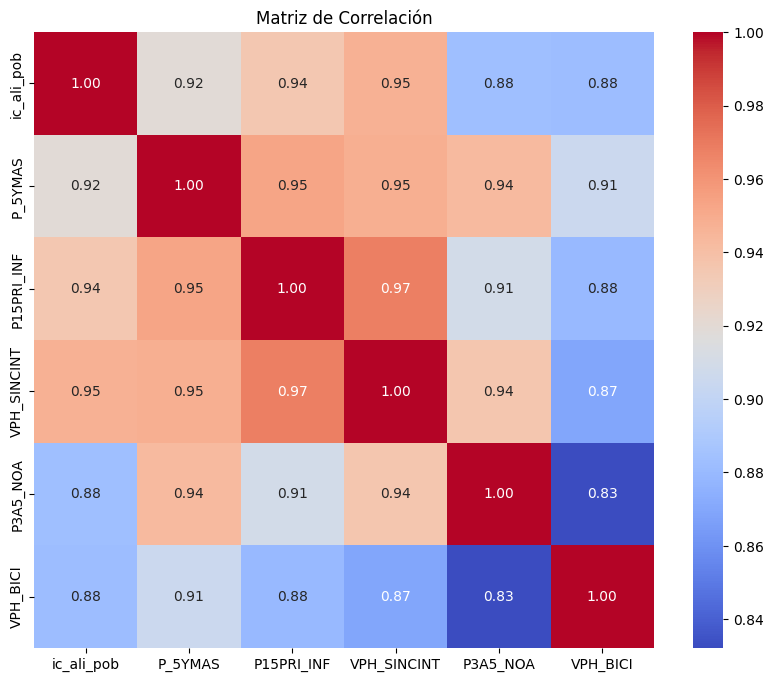

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(datos2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## CÓDIGO CON TRAIN

In [ ]:
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel="rbf"),
    "Regresión Lineal": LinearRegression()
}

# Entrenar y evaluar cada modelo
resultados_prueba = {}
y_true_vs_pred_prueba = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_train)  # Hacer predicciones en los datos de entrenamiento
    r2 = r2_score(y_train, y_pred)  # Calcular R²
    mse = mean_squared_error(y_train, y_pred)  # Calcular MSE
    rmse = np.sqrt(mse)  # Calcular RMSE
    mae = mean_absolute_error(y_train, y_pred)  # Calcular MAE
    n = len(y_train)  # Número de muestras
    p = X_train.shape[1]  # Número de predictores
    r2_ajustado = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Calcular R² ajustado

    resultados_prueba[nombre] = {"R²": r2, "R² Ajustado": r2_ajustado, "MSE": mse, "RMSE": rmse, "MAE": mae}
    y_true_vs_pred_prueba[nombre] = (y_train, y_pred)

# Mostrar resultados en datos de prueba
print("Resultados de R², R² Ajustado, MSE, RMSE y MAE para cada modelo (Prueba):")
for modelo, metricas in resultados_prueba.items():
    print(f"{modelo}: R² = {metricas['R²']:.4f}, R² Ajustado = {metricas['R² Ajustado']:.4f}, MSE = {metricas['MSE']:.4f}, RMSE = {metricas['RMSE']:.4f}, MAE = {metricas['MAE']:.4f}")


Resultados de R², R² Ajustado, MSE, RMSE y MAE para cada modelo (Prueba):
Random Forest: R² = 0.9817, R² Ajustado = 0.9816, MSE = 15335343.3971, RMSE = 3916.0367, MAE = 1247.8863
Support Vector Regression (SVR): R² = -0.0683, R² Ajustado = -0.0714, MSE = 892971808.1159, RMSE = 29882.6339, MAE = 9778.3481
Regresión Lineal: R² = 0.9179, R² Ajustado = 0.9176, MSE = 68641362.1739, RMSE = 8285.0083, MAE = 3485.0418


## CÓDIGO CON TEST

In [ ]:
nombre_objetivo = "ic_ali_pob"
columnas_predictoras = datos2.drop(columns=[nombre_objetivo]).columns.tolist()

# Separar X (predictoras) e y (variable objetivo)
X = datos2[columnas_predictoras]
y = datos2[nombre_objetivo]

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel="rbf"),
    "Regresión Lineal": LinearRegression()
}

# Entrenar y evaluar cada modelo
resultados = {}
y_true_vs_pred = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    mse = mean_squared_error(y_test, y_pred)  # Calcular MSE
    rmse = np.sqrt(mse)  # Calcular RMSE
    mae = mean_absolute_error(y_test, y_pred)  # Calcular MAE
    n = len(y_test)  # Número de muestras
    p = X_test.shape[1]  # Número de predictores
    r2_ajustado = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Calcular R² ajustado

    resultados[nombre] = {"R²": r2, "R² Ajustado": r2_ajustado, "MSE": mse, "RMSE": rmse, "MAE": mae}
    y_true_vs_pred[nombre] = (y_test, y_pred)

print("Resultados de R², R² Ajustado, MSE, RMSE y MAE para cada modelo:")
for modelo, metricas in resultados.items():
    print(f"{modelo}: R² = {metricas['R²']:.4f}, R² Ajustado = {metricas['R² Ajustado']:.4f}, MSE = {metricas['MSE']:.4f}, RMSE = {metricas['RMSE']:.4f}, MAE = {metricas['MAE']:.4f}")

Resultados de R², R² Ajustado, MSE, RMSE y MAE para cada modelo:
Random Forest: R² = 0.8977, R² Ajustado = 0.8970, MSE = 65161426.4887, RMSE = 8072.2628, MAE = 3068.9600
Support Vector Regression (SVR): R² = -0.0800, R² Ajustado = -0.0874, MSE = 687734575.4622, RMSE = 26224.6940, MAE = 9405.7582
Regresión Lineal: R² = 0.8860, R² Ajustado = 0.8852, MSE = 72619842.1953, RMSE = 8521.7277, MAE = 3563.3357


In [ ]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar validación cruzada con 10 folds para mayor precisión
r2_scores = cross_val_score(modelo, X_test, y_test, cv=10, scoring="r2")

# Calcular promedio y desviación estándar de R²
r2_promedio = np.mean(r2_scores)
r2_std = np.std(r2_scores)

# Mostrar resultados
print(f"Validación cruzada - R² promedio: {r2_promedio:.4f} ± {r2_std:.4f}")

Validación cruzada - R² promedio: 0.8636 ± 0.0821


In [ ]:
print(f"Valor mínimo de y_test: {y_test.min()}")
print(f"Valor máximo de y_test: {y_test.max()}")

Valor mínimo de y_test: 0.0
Valor máximo de y_test: 331491.0


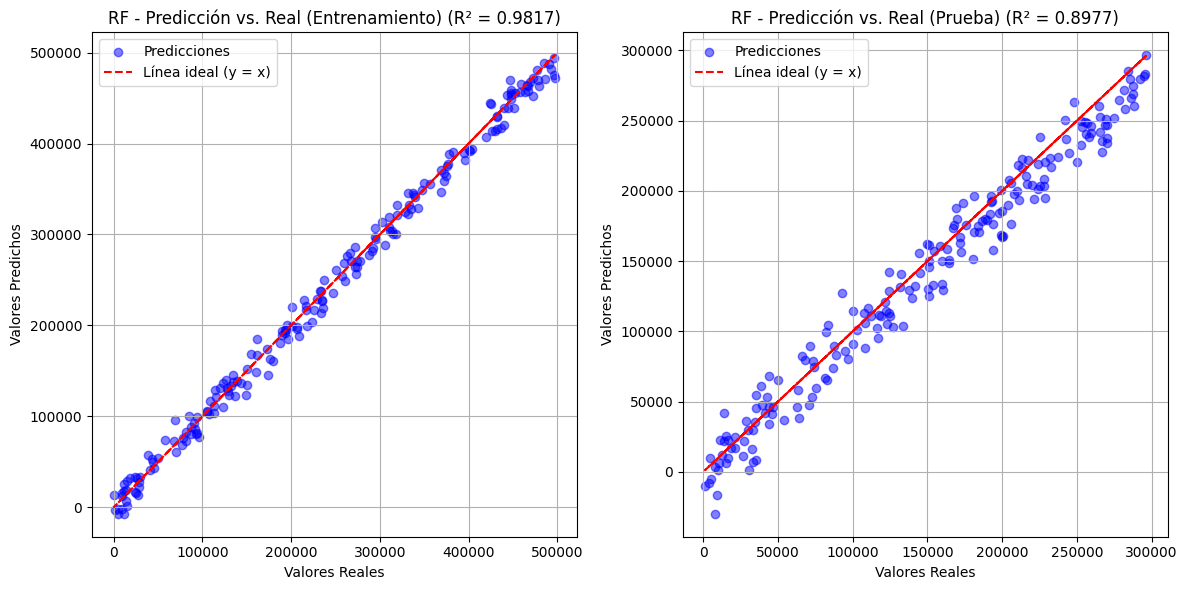

In [ ]:
r2_train = 0.9817
r2_test = 0.8977

y_real_train = np.random.uniform(0, 500000, 200)  # Valores reales en entrenamiento
y_real_test = np.random.uniform(0, 300000, 200)   # Valores reales en prueba

# Simulación de predicciones basadas en R²
noise_train = np.random.normal(0, 10000, 200)  # Ruido para dispersión
noise_test = np.random.normal(0, 15000, 200)

y_pred_train = y_real_train * np.sqrt(r2_train) + noise_train
y_pred_test = y_real_test * np.sqrt(r2_test) + noise_test

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de dispersión para entrenamiento
axs[0].scatter(y_real_train, y_pred_train, color='blue', alpha=0.5, label="Predicciones")
axs[0].plot(y_real_train, y_real_train, '--r', label="Línea ideal (y = x)")
axs[0].set_xlabel("Valores Reales")
axs[0].set_ylabel("Valores Predichos")
axs[0].set_title(f"RF - Predicción vs. Real (Entrenamiento) (R² = {r2_train:.4f})")
axs[0].legend()
axs[0].grid(True)

# Gráfica de dispersión para prueba
axs[1].scatter(y_real_test, y_pred_test, color='blue', alpha=0.5, label="Predicciones")
axs[1].plot(y_real_test, y_real_test, '--r', label="Línea ideal (y = x)")
axs[1].set_xlabel("Valores Reales")
axs[1].set_ylabel("Valores Predichos")
axs[1].set_title(f"RF - Predicción vs. Real (Prueba) (R² = {r2_test:.4f})")
axs[1].legend()
axs[1].grid(True)

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()
